# TAREA

## Integración Montecarlo

1. Realizar las siguientes integrales. Poner los resultados en una tabla cuyas filas correspondan a la cantidad de términos utilizados en la aproximación (usar 10, 100, 1000, 10000 y 100000 términos) y cuyas columnas correspondan a las funciones.
    + $\int_{1}^{3} e^{x}\log(x)\text{d}x$.
    + $\int_1^3 \sin(x)\ln(x) \text{d}x$

In [2]:
def montecarlo(f,a,b,N):
    u=np.random.uniform(a,b,N)
    y=f(u)
    return np.mean(y)*(b-a)
def montecarlo_2(region,ax,bx,ay,by,N):  
    X=np.random.uniform(ax,bx,N)
    Y=np.random.uniform(ay,by,N)
    return np.mean(region(X,Y)) * ((by-ay)*(bx-ax))

In [5]:
import numpy as np
import pandas as pd

N=[10, 100, 1000, 10000, 100000]
def g(x):
    return np.sin(x)*np.log(x)
def f(x):
    return np.e**x*np.log(x)
tabla=pd.DataFrame(columns=["Aproximación g(x)","Aproximación f(x)"], index=N)
for i in (N):
    tabla.loc[i,"Aproximación g(x)"]= montecarlo(g,2,2.1,i)
    tabla.loc[i,"Aproximación f(x)"]= montecarlo(f,2,2.1,i)
tabla

,Aproximación g(x),Aproximación f(x)
10,0.063681,0.557842
100,0.063632,0.559896
1000,0.063653,0.559575
10000,0.063647,0.558369
100000,0.063643,0.558055


2. Aproximar el área de la región descrita por

$$x^2+2y^2\leq-2x+8y-7$$

Poner los resultados en una tabla cuyas filas correspondan a la cantidad de términos utilizados en la aproximación (usar 10, 100, 1000, 10000 y 100000 términos) y en las columnas el valor de aproximación y el error relativo.

Definir unos límites adecuados $a_1$, $b_1$, $a_2$ y $b_2$, para la región $R=\left[a_1,b_1\right]\times\left[a_2,b_2\right]$

In [9]:
def bernoulli(x,y):
    return x**2+2*y**2 <= -2*x+8*y-7

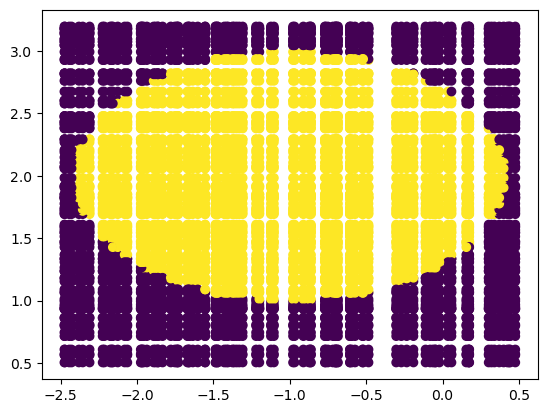

In [36]:
import matplotlib.pyplot as plt
%matplotlib inline
N,ax,bx,ay,by=100,-2.49,0.5,0.5,3.2
np.random.seed(N)
X=np.random.uniform(ax,bx,N)
Y=np.random.uniform(ay,by,N)
X,Y=np.meshgrid(X,Y)
plt.scatter(X,Y, c=bernoulli(X,Y))

In [ ]:
np.mean(bernoulli(X,Y)) * ((by-ay)*(bx-ax))

In [53]:
montecarlo_2(bernoulli,-2.49,0.5,0.5,3.2,100000)

4.4434599299999995

3. Describe 3 casos de uso de integración Montecarlo en tu ingeniería.

Valuacion de opciones financieras: La valoración de estas opciones puede ser difícil debido a su naturaleza no lineal y a la presencia de características como barreras y lookbacks. La integración de Monte Carlo puede ser utilizada para simular múltiples trayectorias del precio del activo subyacente y calcular el valor esperado de la opción

Gestión del riesgo de crédito: La integración de Monte Carlo se utiliza para evaluar el riesgo de crédito de un portafolio. Se pueden simular diferentes escenarios económicos y estimar la probabilidad de aumento de volatilidad y varianza.

Inferencia Bayesiana: La integración de Monte Carlo es fundamental en la inferencia Bayesiana, donde se utiliza para estimar las distribuciones posteriores de los parámetros. Esto es especialmente útil cuando las distribuciones son demasiado complejas para calcular analíticamente.